In [106]:
import geopandas as gpd
import rasterio
from rasterio.features import shapes
import rioxarray
import matplotlib.pyplot as plt
import numpy as np
from skimage.segmentation import slic
from shapely.geometry import shape
from rasterstats import zonal_stats

%matplotlib inline

%load_ext autoreload
%autoreload 2

from gridflow import model

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Demo notebook
This notebook demonstrates the capabilities of the gridflow package. 

In [107]:
lux = model.country("luxembourg", data_path="data/LUX")

<AxesSubplot:>

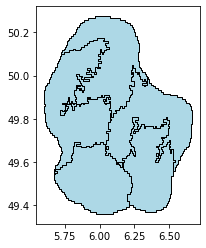

In [108]:
r = lux.create_regions(n=5)
r.plot(edgecolor='black', facecolor='lightblue')

In [109]:
r

,geometry,label,pv,wind,population
0,"POLYGON ((5.96667 50.27500, 6.07500 50.27500, ...",1.0,2.876069,228.166245,87183.585938
1,"POLYGON ((6.23333 50.05000, 6.24167 50.05000, ...",3.0,2.938281,211.507736,282993.625000
2,"POLYGON ((5.98333 50.17500, 6.03333 50.17500, ...",2.0,2.930460,253.339478,81454.406250
3,"POLYGON ((5.67500 49.56667, 5.67500 49.54167, ...",6.0,2.970500,NaN,NaN
4,"POLYGON ((5.81667 49.69167, 5.85833 49.69167, ...",5.0,3.004263,233.677994,432799.125000
5,"POLYGON ((6.23333 49.80833, 6.27500 49.80833, ...",4.0,2.998419,212.959137,148164.578125


In [110]:
lux.create_network()

In [111]:
lux.grid.lines

,id,name,name_en,ref,operator,wd_operator,construction,location,max_voltage,voltages,frequency,circuits,cables,start_date,geometry,regions
0,33813956,220 kV Bundesgrenze – Heisdorf,None,None,Creos,None,,,220000.0,220000,50,2.0,6,None,"LINESTRING (6.15885 49.68392, 6.16238 49.68582...","Int64Index([1, 5], dtype='int64')"
1,33814011,None,None,None,None,None,,,65000.0,65000,50,NaN,6,None,"LINESTRING (6.38921 49.68532, 6.38792 49.68683...","Int64Index([5], dtype='int64')"
2,33814146,Heisdorf - Roost,None,None,None,None,,,220000.0,220000,50,2.0,6,None,"LINESTRING (6.08205 49.77568, 6.07908 49.77352...","Int64Index([1], dtype='int64')"
3,33814199,None,None,None,None,None,,,220000.0,220000,50,NaN,1,None,"LINESTRING (6.13944 49.66904, 6.13948 49.66918...","Int64Index([1], dtype='int64')"
4,33814230,Bertrange - Heisdorf,None,None,None,None,,,220000.0,220000,50,2.0,6,None,"LINESTRING (6.13823 49.66925, 6.13617 49.66971...","Int64Index([1, 4], dtype='int64')"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265,1289345067,None,None,None,None,None,,,220000.0,220000,50,1.0,3,None,"LINESTRING (6.17824 49.95302, 6.17812 49.95290)","Int64Index([0], dtype='int64')"
1266,1289345068,None,None,None,None,None,,,220000.0,220000,50,1.0,3,None,"LINESTRING (6.17757 49.95344, 6.17742 49.95337)","Int64Index([0], dtype='int64')"
1267,1289345069,None,None,None,None,None,,,220000.0,220000,50,NaN,3,None,"LINESTRING (6.19390 49.94500, 6.19382 49.94505...","Int64Index([0], dtype='int64')"
1268,1290091816,None,None,None,None,None,,,NaN,,None,NaN,None,None,"LINESTRING (6.33513 49.56603, 6.33652 49.56560...","Int64Index([5], dtype='int64')"


In [113]:
lux.grid.lines.loc[0, "regions"][0]

1

In [16]:
data_path = "data/LUX/grid.gpkg"
lux_grid = gpd.read_file(data_path, layer="power_line")

In [17]:
lux_grid

,id,name,name_en,ref,operator,wd_operator,construction,location,max_voltage,voltages,frequency,circuits,cables,start_date,geometry
0,33813956,220 kV Bundesgrenze – Heisdorf,None,None,Creos,None,,,220000.0,220000,50,2.0,6,None,"LINESTRING (6.15885 49.68392, 6.16238 49.68582..."
1,33814011,None,None,None,None,None,,,65000.0,65000,50,NaN,6,None,"LINESTRING (6.38921 49.68532, 6.38792 49.68683..."
2,33814146,Heisdorf - Roost,None,None,None,None,,,220000.0,220000,50,2.0,6,None,"LINESTRING (6.08205 49.77568, 6.07908 49.77352..."
3,33814199,None,None,None,None,None,,,220000.0,220000,50,NaN,1,None,"LINESTRING (6.13944 49.66904, 6.13948 49.66918..."
4,33814230,Bertrange - Heisdorf,None,None,None,None,,,220000.0,220000,50,2.0,6,None,"LINESTRING (6.13823 49.66925, 6.13617 49.66971..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265,1289345067,None,None,None,None,None,,,220000.0,220000,50,1.0,3,None,"LINESTRING (6.17824 49.95302, 6.17812 49.95290)"
1266,1289345068,None,None,None,None,None,,,220000.0,220000,50,1.0,3,None,"LINESTRING (6.17757 49.95344, 6.17742 49.95337)"
1267,1289345069,None,None,None,None,None,,,220000.0,220000,50,NaN,3,None,"LINESTRING (6.19390 49.94500, 6.19382 49.94505..."
1268,1290091816,None,None,None,None,None,,,NaN,,None,NaN,None,None,"LINESTRING (6.33513 49.56603, 6.33652 49.56560..."


<AxesSubplot:>

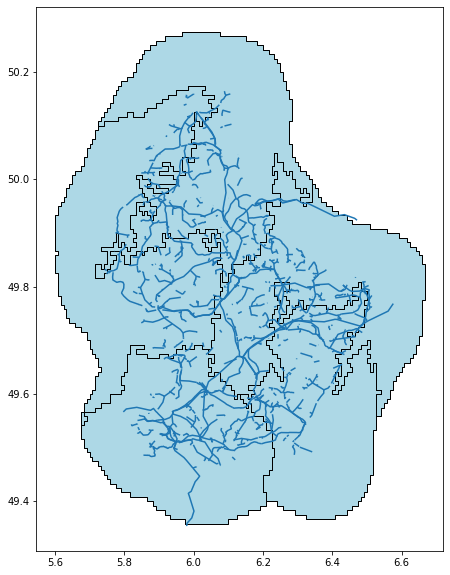

In [26]:
f, a = plt.subplots(figsize=(10, 10))
r.geometry.plot(edgecolor='black', facecolor='lightblue', ax=a)
lux_grid.geometry.plot(ax=a)

In [84]:
type(r)

geopandas.geodataframe.GeoDataFrame

TypeError: no numeric data to plot

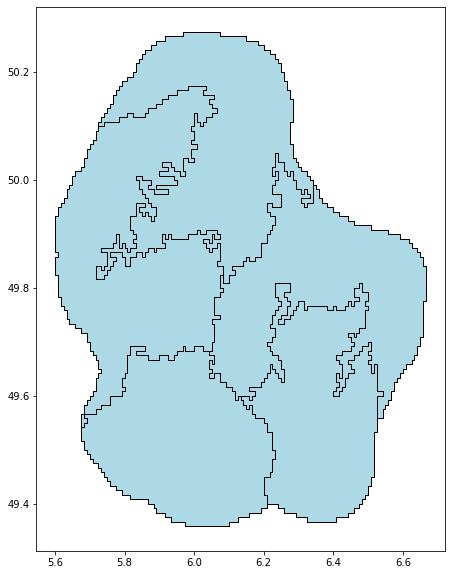

In [46]:
line = lux_grid.loc[0]
route = line.geometry
mask = r.geometry.intersects(route)

int_regions = r[mask]

f, a = plt.subplots(figsize=(10, 10))
r.geometry.plot(edgecolor='black', facecolor='lightblue', ax=a)
line.plot(ax=a)

In [47]:
mask

0    False
1     True
2    False
3    False
4    False
5     True
dtype: bool

In [44]:
print(r.crs)
print(lux_grid.crs if hasattr(lux_grid, 'crs') else 'LineString has no CRS')

GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]
epsg:4326


In [45]:
# Example: assign CRS if missing
gdf_polygons = r.set_crs("EPSG:4326")  # WGS84, for example

# Convert lines to GeoSeries or GeoDataFrame and assign same CRS
import geopandas as gpd
line = lux_grid.loc[0:1]
gdf_lines = gpd.GeoSeries([line], crs="EPSG:4326")

# Now do intersects with matching CRS
mask = gdf_polygons.intersects(gdf_lines.iloc[0])
print(mask)

0    False
1    False
2    False
3    False
4    False
5    False
dtype: bool


/Users/mohini/opt/anaconda3/lib/python3.7/site-packages/shapely/geometry/geo.py:123: ShapelyDeprecationWarning: GeometryTypeError will derive from ShapelyError and not TypeError or ValueError in Shapely 2.0.
  raise GeometryTypeError("Unknown geometry type: %s" % geom_type)
/Users/mohini/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  import sys
/Users/mohini/opt/anaconda3/lib/python3.7/site-packages/geopandas/base.py:31: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


In [50]:
idxs = np.arange(0, 1)
for idx in idxs:
    line = lux_grid.loc[idx].geometry
    mask = r.intersects(line)
    print(mask)
    int_regions = r[mask]
    print(int_regions)

0    False
1     True
2    False
3    False
4    False
5     True
dtype: bool
                                            geometry  label        pv  \
1  POLYGON ((6.23333 50.05000, 6.24167 50.05000, ...    3.0  2.938281   
5  POLYGON ((6.23333 49.80833, 6.27500 49.80833, ...    4.0  2.998419   

         wind     population  
1  211.507736  282993.625000  
5  212.959137  148164.578125  


In [54]:
int_regions.index

Int64Index([1, 5], dtype='int64')

In [38]:
int_regions

,geometry,label,pv,wind,population


In [32]:
for row in lux_grid.loc[0:5]:
    print(row)

id
name
name_en
ref
operator
wd_operator
construction
location
max_voltage
voltages
frequency
circuits
cables
start_date
geometry
